--- INICIANDO TREINAMENTO DA IA (FASE 4) ---
1. Carregando e processando dados...
Dados de Treino: (228, 60, 6)
Dados de Teste: (58, 60, 6)

2. Construindo a Rede Neural...
Modelo compilado com sucesso!


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 128)        │        69,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,179 (469.45 KB)

 Trainable params: 120,179 (469.45 KB)

 Non-trainable params: 0 (0.00 B)


3. Iniciando Treinamento (Isso pode demorar um pouco)...
Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - loss: 0.2122 - val_loss: 0.0054
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0276 - val_loss: 0.0244
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0173 - val_loss: 0.0048
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - loss: 0.0150 - val_loss: 0.0071
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - loss: 0.0120 - val_loss: 0.0028
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0107 - val_loss: 0.0031
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0100 - val_loss: 0.0035
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.0105 - val_loss: 0.0069
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0118 - val_loss: 0.0037
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0085 - val_loss: 0.0046
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 0.0097 - val_loss: 0.0030
Epoch 12/50
8/8 ━━━━━━

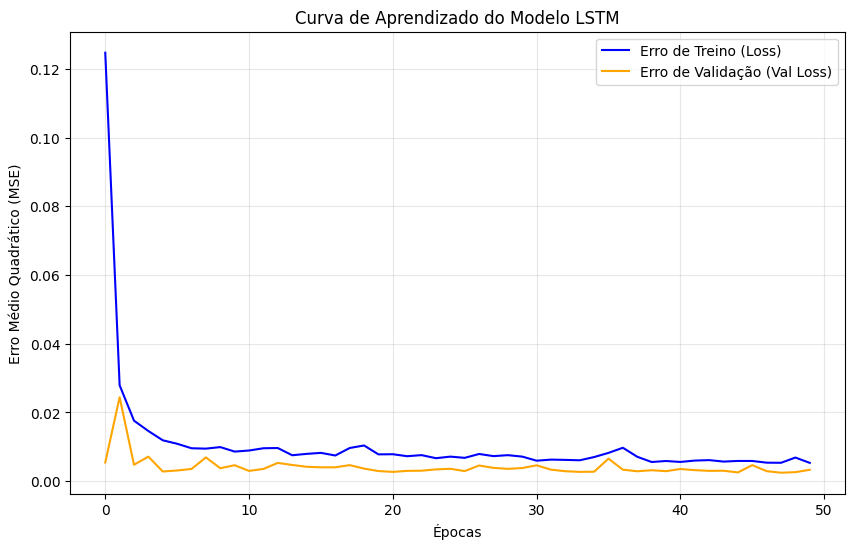


--- FASE 4 CONCLUÍDA COM SUCESSO ---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def treinar_modelo():
    print("--- INICIANDO TREINAMENTO DA IA (FASE 4) ---")

    # --- 1. PREPARAÇÃO DOS DADOS (Repetindo a lógica da Fase 3 para garantir) ---
    print("1. Carregando e processando dados...")
    try:
        df = pd.read_csv('dataset_consolidado.csv', sep=';', decimal=',', index_col='Data')
    except FileNotFoundError:
        print("Erro: 'dataset_consolidado.csv' não encontrado.")
        return

    # Definir as features (Têm de ser as mesmas 6 da fase anterior)
    features = ['Preco_Fechamento', 'Volume', 'SMA_7', 'SMA_21', 'RSI', 'Sentimento_Medio']
    data = df[features].values

    # Normalizar (0 a 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_scaled = scaler.fit_transform(data)

    # Criar Janelas (60 dias)
    X, y = [], []
    janela = 60

    for i in range(janela, len(data_scaled)):
        X.append(data_scaled[i-janela:i]) # 60 dias passados
        y.append(data_scaled[i, 0])       # Preço do dia seguinte (Coluna 0 = Preco)

    X, y = np.array(X), np.array(y)

    # Divisão Treino vs Teste (80% Treino, 20% Teste)
    # IMPORTANTE: Não podemos embaralhar (shuffle) pois é uma série temporal!
    tamanho_treino = int(len(X) * 0.8)

    X_train, X_test = X[:tamanho_treino], X[tamanho_treino:]
    y_train, y_test = y[:tamanho_treino], y[tamanho_treino:]

    print(f"Dados de Treino: {X_train.shape}")
    print(f"Dados de Teste: {X_test.shape}")

    # --- 2. CONSTRUÇÃO DA ARQUITETURA LSTM (O 'Cérebro') ---
    print("\n2. Construindo a Rede Neural...")
    model = Sequential()

    # Camada 1: LSTM com 128 neurônios (return_sequences=True para passar para a próxima LSTM)
    model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2)) # Evitar decorar

    # Camada 2: LSTM com 64 neurônios
    model.add(LSTM(units=64, return_sequences=False))
    model.add(Dropout(0.2))

    # Camada Densa (Conexão final)
    model.add(Dense(units=25))

    # Camada de Saída (1 neurônio = O Preço Previsto)
    model.add(Dense(units=1))

    # Compilar (Configurar o "professor" da rede)
    model.compile(optimizer='adam', loss='mean_squared_error')

    print("Modelo compilado com sucesso!")
    model.summary() # Mostra a estrutura no console

    # --- 3. TREINAMENTO (O Processo de Aprendizado) ---
    print("\n3. Iniciando Treinamento (Isso pode demorar um pouco)...")
    # Epochs = Quantas vezes ela estuda a prova toda. Batch_size = Quantos dias estuda de cada vez.
    history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), verbose=1)

    # --- 4. SALVAR E EXIBIR RESULTADOS ---

    # Salvar o modelo (Requisito do PDF)
    model.save('modelo_cripto.keras')
    print("\nModelo salvo como 'modelo_cripto.keras'")

    # Plotar Curva de Perda (Loss) - Requisito: "Resultados (v1)"
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Erro de Treino (Loss)', color='blue')
    plt.plot(history.history['val_loss'], label='Erro de Validação (Val Loss)', color='orange')
    plt.title('Curva de Aprendizado do Modelo LSTM')
    plt.xlabel('Épocas')
    plt.ylabel('Erro Médio Quadrático (MSE)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    print("\n--- FASE 4 CONCLUÍDA COM SUCESSO ---")

if __name__ == "__main__":
    treinar_modelo()